**What are the current in-demand skills for data analysts?**

***Methology***

* Aggregate skill counts monthly
* Re-analyze based on percentage of total jobs
* Plot the monthly skill demand

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Group the Skills by Month

Select only those job postings that are for Data Analysts and the job country is France. Then extract the month from each job's posting date to see when jobs are listed. Next, converts a column that lists skills into a usable list format. Finally, it rearranges the data so that each skill from the list gets its own row.

In [4]:
## Skill count per month for data analysts
df_DA_FR = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'France')].copy()

df_DA_FR['job_posted_month_no'] = df_DA_FR['job_posted_date'].dt.month

# Explode job_skills column
df_DA_FR_explode = df_DA_FR.explode('job_skills')

Create a pivot table from the df_DA_FR_explode, setting 'month' as the index, job_skills as the columns, and fills missing entries with zero.

In [5]:
# Group by month and job_skills
df_DA_FR_pivot = df_DA_FR_explode.pivot_table(index='job_posted_month_no', columns='job_skills',  aggfunc='size', fill_value=0)

df_DA_FR_pivot

job_skills,airflow,alteryx,angular,ansible,asana,asp.net,assembly,atlassian,aws,azure,...,trello,typescript,unify,unix,vba,visio,vmware,vue,windows,word
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,6,3,1,0,1,0,0,0,2,8,...,1,0,0,0,7,2,0,8,1,4
2,10,5,1,0,2,0,0,0,11,11,...,0,0,0,0,11,2,0,9,0,3
3,11,4,2,1,0,0,0,0,7,10,...,0,0,0,1,6,1,0,7,1,1
4,5,2,0,1,0,0,0,0,12,15,...,0,0,1,0,9,3,0,2,1,0
5,13,1,0,0,0,0,0,0,12,9,...,0,0,1,0,11,6,0,4,2,0
6,9,1,0,0,0,0,2,0,4,8,...,0,0,0,0,6,1,0,1,0,0
7,1,0,0,0,0,0,0,0,6,8,...,0,0,0,1,3,1,0,1,0,0
8,2,2,0,0,0,0,0,0,7,17,...,5,0,0,1,5,0,1,2,2,1
9,2,1,0,1,0,1,0,0,3,2,...,0,1,0,0,6,1,0,2,0,0


Columns sorting by count and change month numbers to names
It adds a new row labeled Total that sums up counts across all months for each skill. Finally, it reorders the columns based on the total counts, displaying them from highest to lowest, and shows the updated pivot table.
Then the row labeled Total was deleted

In [11]:
# sorts by count
df_DA_FR_pivot.loc['Total'] = df_DA_FR_pivot.sum()
df_DA_FR_pivot = df_DA_FR_pivot[df_DA_FR_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_FR_pivot = df_DA_FR_pivot.drop('Total')

df_DA_FR_pivot

job_skills,sql,python,tableau,power bi,excel,sas,r,azure,gcp,vba,...,pascal,outlook,sass,slack,seaborn,symfony,typescript,terminal,symphony,vmware
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,88,57,44,33,30,50,17,8,9,7,...,0,0,1,1,0,0,0,1,0,0
2,85,55,46,44,32,36,19,11,8,11,...,0,0,0,0,0,0,0,0,0,0
3,86,59,48,41,25,18,26,10,6,6,...,0,0,0,0,1,1,0,0,1,0
4,67,47,30,38,26,24,19,15,10,9,...,0,0,0,0,0,0,0,0,0,0
5,73,61,44,30,22,20,22,9,15,11,...,0,0,0,0,0,0,0,0,0,0
6,55,42,25,27,16,12,16,8,8,6,...,0,1,0,0,0,0,0,0,0,0
7,48,28,24,22,12,4,13,8,7,3,...,1,0,0,0,0,0,0,0,0,0
8,60,49,28,33,18,18,11,17,4,5,...,0,0,0,0,0,0,0,0,0,1
9,21,19,13,17,14,6,5,2,3,6,...,0,0,0,0,0,0,1,0,0,0


Plot a line chart of the top 5 skills for data analysts, indexed by month. It selects the first five columns and plots them.

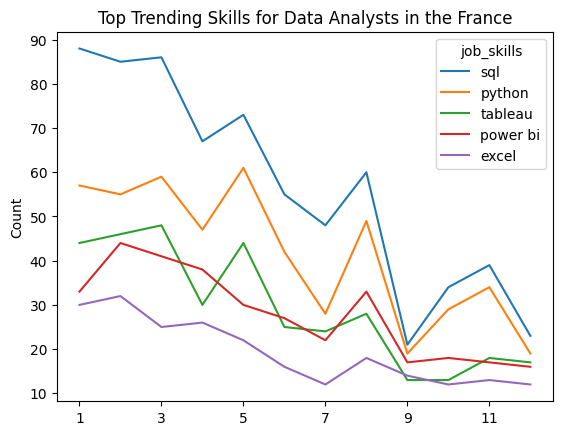

In [12]:
df_DA_FR_pivot.iloc[:, :5].plot(kind='line') # Top 5 skills for Data Analysts in France. iloc[:, :5] selects the first 5 columns

plt.title('Top Trending Skills for Data Analysts in the France')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

To compute the percentages, it is necessary to calculates the total number of entries for each month in df_DA by grouping the data by 'month' and counting the number of occurrences in each group, storing the results in DA_totals.

In [10]:
# Get monthly totals
DA_totals = df_DA_FR.groupby('job_posted_month_no').size()

DA_totals

job_posted_month_no
1     141
2     149
3     153
4     130
5     135
6      93
7      60
8      95
9      59
10     59
11     68
12     63
dtype: int64

The code below calculates the percentage of each skill's occurrence for each month by dividing the first 12 rows of the df_DA_pivot DataFrame, which contains skill counts, by the monthly totals in DA_totals and multiplying by 100. The new DataFrame, df_DA_pivot_percent, shows skill distributions as percentages of total monthly job entries.

In [13]:
# divide first 12 rows of df_DA_pivot by DA_totals
df_DA_FR_percent = df_DA_FR_pivot.iloc[:12].div(DA_totals/100, axis=0)

# changes month number to month name
df_DA_FR_percent = df_DA_FR_percent.reset_index()
df_DA_FR_percent['job_posted_month'] = df_DA_FR_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_FR_percent = df_DA_FR_percent.set_index('job_posted_month')
df_DA_FR_percent = df_DA_FR_percent.drop(columns='job_posted_month_no')

df_DA_FR_percent

job_skills,sql,python,tableau,power bi,excel,sas,r,azure,gcp,vba,...,pascal,outlook,sass,slack,seaborn,symfony,typescript,terminal,symphony,vmware
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,62.411348,40.425532,31.205674,23.404255,21.276596,35.460993,12.056738,5.673759,6.382979,4.964539,...,0.000000,0.000000,0.70922,0.70922,0.000000,0.000000,0.000000,0.70922,0.000000,0.000000
Feb,57.046980,36.912752,30.872483,29.530201,21.476510,24.161074,12.751678,7.382550,5.369128,7.382550,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
Mar,56.209150,38.562092,31.372549,26.797386,16.339869,11.764706,16.993464,6.535948,3.921569,3.921569,...,0.000000,0.000000,0.00000,0.00000,0.653595,0.653595,0.000000,0.00000,0.653595,0.000000
Apr,51.538462,36.153846,23.076923,29.230769,20.000000,18.461538,14.615385,11.538462,7.692308,6.923077,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
May,54.074074,45.185185,32.592593,22.222222,16.296296,14.814815,16.296296,6.666667,11.111111,8.148148,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
Jun,59.139785,45.161290,26.881720,29.032258,17.204301,12.903226,17.204301,8.602151,8.602151,6.451613,...,0.000000,1.075269,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
Jul,80.000000,46.666667,40.000000,36.666667,20.000000,6.666667,21.666667,13.333333,11.666667,5.000000,...,1.666667,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
Aug,63.157895,51.578947,29.473684,34.736842,18.947368,18.947368,11.578947,17.894737,4.210526,5.263158,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,1.052632
Sep,35.593220,32.203390,22.033898,28.813559,23.728814,10.169492,8.474576,3.389831,5.084746,10.169492,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,1.694915,0.00000,0.000000,0.000000


*Skill Demand by Monthly Postings*

Creates a line plot for the top five skills of data analysts, shown as percentages of the total job entries per month, using the first 5 columns of the df_DA_pivot_percent DataFrame. Also the legend is moved outside of the plot for readability.

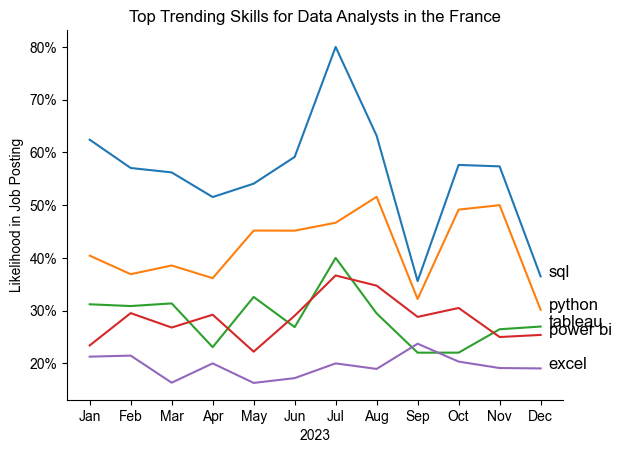

In [15]:
from matplotlib.ticker import PercentFormatter

df_plot = df_DA_FR_percent.iloc[:, :5]
sns.lineplot(data=df_plot, dashes=False, legend='full', palette='tab10')
sns.set_theme(style='ticks')
sns.despine() # remove top and right spines

plt.title('Top Trending Skills for Data Analysts in the France')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))

# annotate the plot with the top 5 skills using plt.text()
for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i], color='black')

plt.show()